In [40]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 10 # Ensure reproducible results
%matplotlib inline
plt.style.use('ggplot')

# Flying to New York City - Raw Data Preprocess

### Do not execute the following code!

Read the data from csv files and concatenate them to data framework


In [2]:
all_pandas = []
for i in range(1,13):
    path_data = os.path.join(os.getcwd(), 'DME_data', '78448857_T_ONTIME_2016_'+str(i)+'.csv')
    data_full = pd.read_csv(path_data, delimiter = ',',index_col=None, header=0)
    all_pandas.append(data_full)
data_frame = pd.concat(all_pandas)

In [3]:
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(data_frame.shape[0], data_frame.shape[1]))

There are 492181 entries and 40 columns in the landsat_train DataFrame


In [4]:
data_frame = data_frame.drop('Unnamed: 39',1)

In [21]:
data_frame.to_csv('raw_data.csv',sep=",",)

### Execute the following code to load the raw data

Read the raw data and pass it to pandas framework. Please remember to drop the collumn "Unnamed: 0" (Some weird collumn the csv is passing to the data, it has nothing to do with the real data).

In [31]:
path_data = os.path.join(os.getcwd(),'raw_data.csv')
df = pd.read_csv(path_data, delimiter = ',')
df = df.drop('Unnamed: 0',1)

In [32]:
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(df.shape[0], df.shape[1]))

There are 492181 entries and 39 columns in the landsat_train DataFrame


These are the features that I downloaded. Some of them are unnecessary. Read the Readme.csv and Terms.csv files to know more about each feature.

In [33]:
df.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
UNIQUE_CARRIER          object
AIRLINE_ID               int64
CARRIER                 object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
ORIGIN_STATE_NM         object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK            object
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELA

### Cancelled Flights

There are 8949 cancelled flights out of 483232


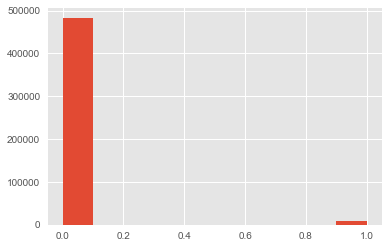

In [69]:
plt.hist(df['CANCELLED'].values)
count=0
count_c=0
for v in df['CANCELLED'].values:
    if v==1.0:
        count_c +=1
    else:
        count +=1
print ("There are {} cancelled flights out of {}".format(count_c,count))